In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
star = pd.read_excel('datasets/star/star.xlsx')

In [3]:
star.head()

,tmathssk,treadssk,classk,totexpk,sex,freelunk,race,schidkn
0,473,447,small.class,7,girl,no,white,63
1,536,450,small.class,21,girl,no,black,20
2,463,439,regular.with.aide,0,boy,yes,black,19
3,559,448,regular,16,boy,no,white,69
4,489,447,small.class,5,boy,yes,white,79


In [4]:
#specify columns you want
star = star[['tmathssk','treadssk','classk','totexpk','schidkn']]
star.columns

Index(['tmathssk', 'treadssk', 'classk', 'totexpk', 'schidkn'], dtype='object')

In [5]:
star.head()

,tmathssk,treadssk,classk,totexpk,schidkn
0,473,447,small.class,7,63
1,536,450,small.class,21,20
2,463,439,regular.with.aide,0,19
3,559,448,regular,16,69
4,489,447,small.class,5,79


In [6]:
#drop columns (rowsaxis = 0),(column axis = 1)
star = star.drop('schidkn', axis= 1)

In [7]:
star

,tmathssk,treadssk,classk,totexpk
0,473,447,small.class,7
1,536,450,small.class,21
2,463,439,regular.with.aide,0
3,559,448,regular,16
4,489,447,small.class,5
...,...,...,...,...
5743,468,422,small.class,6
5744,559,483,small.class,8
5745,513,437,regular,0
5746,478,431,regular,24


In [8]:
#create calculated column
star['new_column'] = star['tmathssk'] + star['treadssk']
star.head()

,tmathssk,treadssk,classk,totexpk,new_column
0,473,447,small.class,7,920
1,536,450,small.class,21,986
2,463,439,regular.with.aide,0,902
3,559,448,regular,16,1007
4,489,447,small.class,5,936


In [9]:
#rename columns
star = star.rename(columns = {'new_column':'ttl_score'})

In [10]:
star.head()

,tmathssk,treadssk,classk,totexpk,ttl_score
0,473,447,small.class,7,920
1,536,450,small.class,21,986
2,463,439,regular.with.aide,0,902
3,559,448,regular,16,1007
4,489,447,small.class,5,936


In [11]:
#sort values
star.sort_values(by=['classk','tmathssk']).head()

,tmathssk,treadssk,classk,totexpk,ttl_score
309,320,360,regular,6,680
1470,320,315,regular,3,635
2326,339,388,regular,6,727
2820,354,398,regular,6,752
4925,354,391,regular,8,745


In [12]:
#sort values specifying ascending and descending
star.sort_values(by=['classk','tmathssk'], ascending=[True,False]).head()

,tmathssk,treadssk,classk,totexpk,ttl_score
724,626,474,regular,15,1100
1466,626,554,regular,11,1180
1634,626,580,regular,15,1206
2476,626,538,regular,20,1164
2495,626,522,regular,7,1148


In [13]:
star_smallclass = star['classk'] == 'small.class'

In [15]:
star_filtered = star[star_smallclass]

In [16]:
star_filtered.head()

,tmathssk,treadssk,classk,totexpk,ttl_score
0,473,447,small.class,7,920
1,536,450,small.class,21,986
4,489,447,small.class,5,936
8,439,478,small.class,11,917
9,528,455,small.class,10,983


In [18]:
star_filtered.shape

(1733, 5)

In [19]:
star_tread = star['treadssk'] >= 500

In [20]:
star_treadssk = star[star_tread]

In [21]:
star_treadssk.shape

(233, 5)

In [22]:
star_treadssk.head()

,tmathssk,treadssk,classk,totexpk,ttl_score
26,559,522,regular,8,1081
105,536,507,regular.with.aide,3,1043
150,547,565,regular.with.aide,9,1112
165,513,503,small.class,7,1016
175,559,605,regular.with.aide,5,1164


In [30]:
#find all records with at least 500 reading score and in small class
star_filtered = star[(star['treadssk'] >= 500) & (star['classk'] == 'small.class')]

In [31]:
star_filtered.shape

(84, 5)

In [32]:
#group data by class
star_grouped = star.groupby('classk')
star_grouped

In [33]:
#aggregate grouped data by math score
star_grouped[['tmathssk']].mean()

,tmathssk
classk,
regular,483.261000
regular.with.aide,483.009926
small.class,491.470283


In [34]:
#find maximum total score after grouping data by teacher's ecperience
star.groupby('totexpk')[['ttl_score']].max().head()

,ttl_score
totexpk,
0,1171
1,1133
2,1091
3,1203
4,1229


In [35]:
star = pd.read_excel('datasets/star/star.xlsx')
districts = pd.read_csv('datasets/star/districts.csv')

In [37]:
#merge districts dataset with star by left joining
star.merge(districts, how = 'left').head()

,tmathssk,treadssk,classk,totexpk,sex,freelunk,race,schidkn,school_name,county
0,473,447,small.class,7,girl,no,white,63,Ridgeville,New Liberty
1,536,450,small.class,21,girl,no,black,20,South Heights,Selmont
2,463,439,regular.with.aide,0,boy,yes,black,19,Bunnlevel,Sattley
3,559,448,regular,16,boy,no,white,69,Hokah,Gallipolis
4,489,447,small.class,5,boy,yes,white,79,Lake Mathews,Sugar Mountain


In [38]:
#merge tmathssk and treadssk into one column
star_pivot = pd.melt(frame = star, id_vars = 'schidkn', value_vars=['tmathssk', 'treadssk'], value_name = 'score', var_name ='testtype')

In [39]:
star_pivot.head()

,schidkn,testtype,score
0,63,tmathssk,473
1,20,tmathssk,536
2,19,tmathssk,463
3,69,tmathssk,559
4,79,tmathssk,489


In [40]:
#rename records in testtype
mapping = {'tmathssk':'math','treadssk':'reading'}
star_pivot['testtype'] = star_pivot['testtype'].map(mapping)

In [41]:
#find unique values in testtype
star_pivot['testtype'].unique()

array(['math', 'reading'], dtype=object)

In [42]:
#separate math score from reading score by widening pivot table
star_pivot.pivot_table(index = 'schidkn', columns = 'testtype', values = 'score').reset_index()

testtype,schidkn,math,reading
0,1,492.272727,443.848485
1,2,450.576923,407.153846
2,3,491.452632,441.000000
3,4,467.689655,421.620690
4,5,460.084746,427.593220
...,...,...,...
74,75,504.329268,440.036585
75,76,490.260417,431.666667
76,78,468.457627,417.983051
77,79,490.500000,434.451613


<AxesSubplot:xlabel='classk', ylabel='count'>

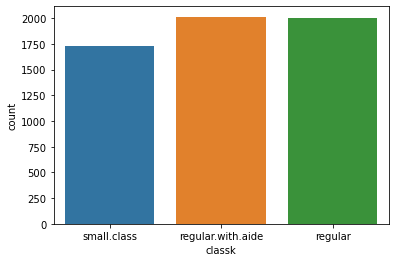

In [43]:
#count of observation for each level of class
sns.countplot(x='classk', data = star)

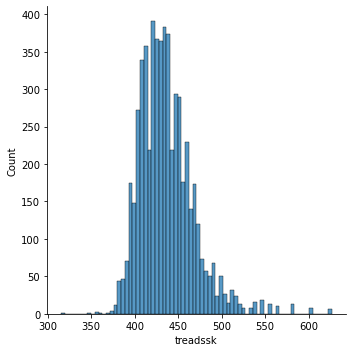

In [44]:
#histogram for the distribution of treadssk
sns.displot(x='treadssk', data = star)

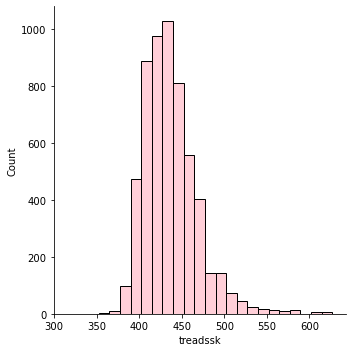

In [45]:
#chabge the number of bins to 25 and the plot color to pink
sns.displot(x='treadssk', data = star, bins = 25, color = 'pink')

<AxesSubplot:xlabel='treadssk'>

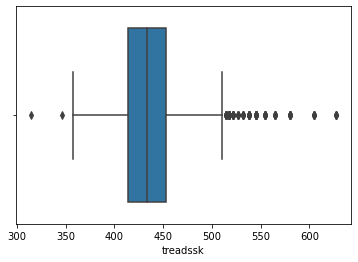

In [46]:
#boxplot of the distribution of treadssk
sns.boxplot(x='treadssk', data = star)

<AxesSubplot:ylabel='treadssk'>

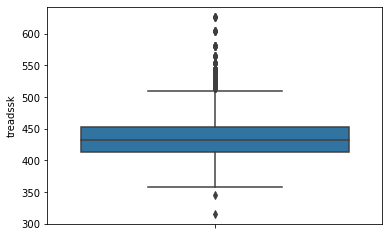

In [47]:
#boxplot of the distribution of treadssk flipped 
sns.boxplot(y='treadssk', data = star)

<AxesSubplot:xlabel='classk', ylabel='treadssk'>

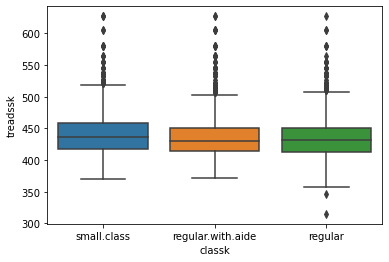

In [48]:
#boxplot for each level of class size
sns.boxplot(x='classk', y='treadssk', data = star)

<AxesSubplot:xlabel='tmathssk', ylabel='treadssk'>

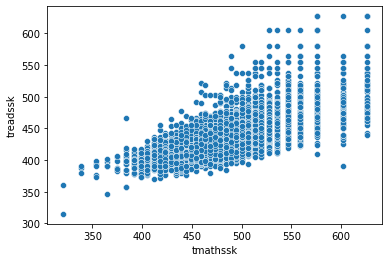

In [49]:
#relationship betwwn tmathssk and treadssk scatterplot
sns.scatterplot(x='tmathssk', y='treadssk', data = star)

Text(0.5, 1.0, 'math score versus reading score')

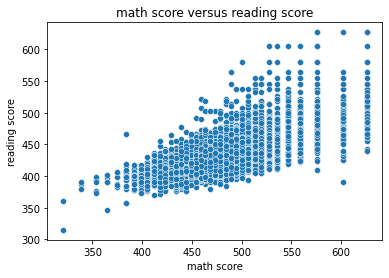

In [50]:
#relationship betwwn tmathssk and treadssk scatterplot adding titles and labels
sns.scatterplot(x='tmathssk', y='treadssk', data = star)
plt.xlabel('math score')
plt.ylabel('reading score')
plt.title('math score versus reading score')